# Lambda School, Intro to Data Science, Day 8 — Classification!

Yesterday's lesson:

#### [regression model](https://developers.google.com/machine-learning/glossary/#regression_model)
> A type of model that outputs **continuous (typically, floating-point) values.**

Today's lesson: 

#### [classification model](https://developers.google.com/machine-learning/glossary/#classification_model)
> A type of machine learning model for distinguishing among **two or more discrete classes.**

Both are types of:

#### [supervised machine learning](https://developers.google.com/machine-learning/glossary/#supervised_machine_learning)
> Training a model from input data and its corresponding labels. **Supervised machine learning is analogous to a student learning a subject by studying a set of questions and their corresponding answers.** After mastering the mapping between questions and answers, the student can then provide answers to new (never-before-seen) questions on the same topic. Compare with unsupervised machine learning.

For examples, see this [**diagram by Andrew Ng in Harvard Business Review**](https://hbr.org/resources/images/article_assets/2016/10/W161026_NG_WHATMACHINEv2.png).

## Linear Regression vs Logistic Regression, for Classification

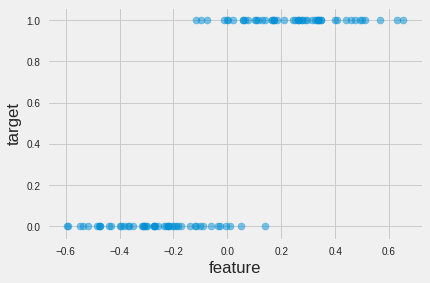

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate data 
x, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1, class_sep=0.25, random_state=0)

plt.style.use('fivethirtyeight')
plt.scatter(x, y, s=50, alpha=0.5)
plt.xlabel('feature')
plt.ylabel('target');

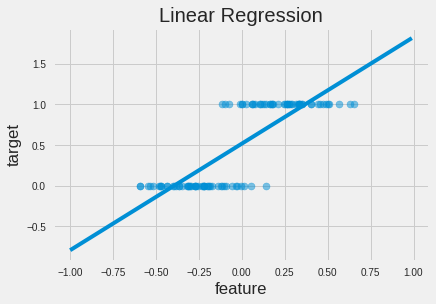

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

inputs = [[x/100] for x in range(-100, 100)]
predictions = model.predict(inputs)

plt.scatter(x, y, s=50, alpha=0.5)
plt.plot(inputs, predictions)
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Linear Regression');

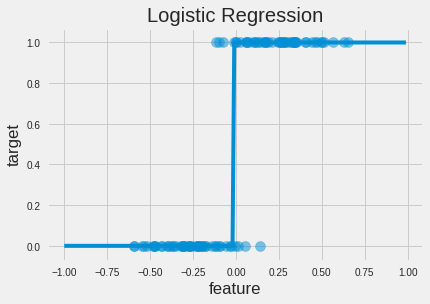

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x, y)
predictions = model.predict(inputs)

plt.scatter(x, y, s=100, alpha=0.5)
plt.plot(inputs, predictions)
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Logistic Regression');

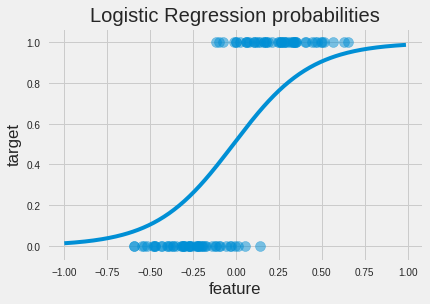

In [0]:
predictions = model.predict_proba(inputs)[:, 1]

plt.scatter(x, y, s=100, alpha=0.5)
plt.plot(inputs, predictions)
plt.xlabel('feature')
plt.ylabel('target')
plt.title('Logistic Regression probabilities');

# Predict survival on the Titanic

## Load data

In [0]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

train, test = train_test_split(sns.load_dataset('titanic'), random_state=0)
train.shape, test.shape

((668, 15), (223, 15))

In [0]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
105,0,3,male,28.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
253,0,3,male,30.0,1,0,16.1000,S,Third,man,True,NaN,Southampton,no,False
320,0,3,male,22.0,0,0,7.2500,S,Third,man,True,NaN,Southampton,no,True
706,1,2,female,45.0,0,0,13.5000,S,Second,woman,False,NaN,Southampton,yes,True


In [0]:
train.survived.value_counts(normalize=True)

0    0.613772
1    0.386228
Name: survived, dtype: float64

## Majority classifier

[*Data Science for Business*](https://www.safaribooksonline.com/library/view/data-science-for/9781449374273/) recommends,

> For classification tasks, one good baseline is the ***majority classifier, a naive classifier that always chooses the majority class of the training dataset.*** ... 

> This may seem like advice so obvious it can be passed over quickly, but it is worth spending an extra moment here. There are many cases where smart, analytical people have been tripped up in skipping over this basic comparison. For example, an analyst may see a classification accuracy of 94% from her classifier and conclude that it is doing fairly well—when in fact only 6% of the instances are positive. So, the simple majority prediction classifier also would have an accuracy of 94%.

In [0]:
predictions = [0] * len(train)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(train.survived, predictions)

0.6137724550898204

In [0]:
from sklearn.metrics import confusion_matrix

def matrix(y_true, y_pred):
    data = confusion_matrix(y_true, y_pred)
    index = ['Actual 0', 'Actual 1']
    columns = ['Predicted 0', 'Predicted 1']
    return pd.DataFrame(data, index, columns)
                        
matrix(train.survived, predictions)

,Predicted 0,Predicted 1
Actual 0,410,0
Actual 1,258,0


In [0]:
from sklearn.metrics import recall_score
recall_score(train.survived, predictions)

0.0

In [0]:
# Recall
0 / 258

0.0

In [0]:
# Accuracy
410 / (410 + 258)

0.6137724550898204

# Feature preprocessing

In [0]:
train[['sex', 'age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 105 to 684
Data columns (total 2 columns):
sex    668 non-null object
age    535 non-null float64
dtypes: float64(1), object(1)
memory usage: 35.7+ KB


### Encode `sex`

In [0]:
train['female'] = train.sex == 'female'
test['female'] = test.sex == 'female'

In [0]:
train[['sex', 'female']].head()

,sex,female
105,male,False
68,female,True
253,male,False
320,male,False
706,female,True


### Impute `age`

In [0]:
train.age.isnull().sum()

133

In [0]:
train.age.mean()

29.9

In [0]:
train.age.fillna(train.age.mean(), inplace=True)
train.age.isnull().sum()

0

In [0]:
test.age.isnull().sum()

44

In [0]:
test.age.mean()

29.098715083798883

In [0]:
test.age.fillna(train.age.mean(), inplace=True)
test.age.isnull().sum()

0

# Logistic Regression

In [0]:
features = ['female', 'age']
target = 'survived'

model = LogisticRegression()
model.fit(train[features], train[target])

# Train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

# Test accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.7889221556886228
Test accuracy: 0.7802690582959642


In [0]:
matrix(y_true, y_pred)

,Predicted 0,Predicted 1
Actual 0,115,24
Actual 1,25,59


In [0]:
recall_score(y_true, y_pred)

0.7023809523809523

In [0]:
# Recall
59 / (59 + 25)

0.7023809523809523

In [0]:
# Accuracy
(59 + 115) / (59 + 115 + 24 + 25)

0.7802690582959642

In [0]:
model.coef_, model.intercept_

(array([[ 2.43123179, -0.00948601]]), array([-1.0976689]))

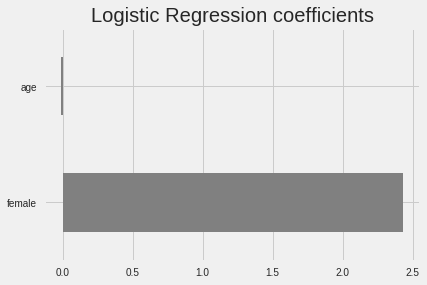

In [0]:
pd.Series(model.coef_[0], features).plot.barh(color='gray')
plt.title('Logistic Regression coefficients');

# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(train[features], train[target])

# Train accuracy
y_true = train[target]
y_pred = model.predict(train[features])
print('Train accuracy:', accuracy_score(y_true, y_pred))

# Test accuracy
y_true = test[target]
y_pred = model.predict(test[features])
print('Test accuracy:', accuracy_score(y_true, y_pred))

Train accuracy: 0.7949101796407185
Test accuracy: 0.7757847533632287


In [0]:
recall_score(y_true, y_pred)

0.75

In [0]:
matrix(y_true, y_pred)

,Predicted 0,Predicted 1
Actual 0,110,29
Actual 1,21,63


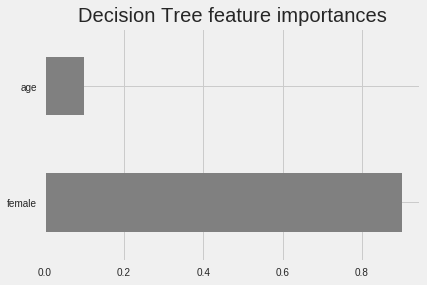

In [0]:
pd.Series(model.feature_importances_, features).plot.barh(color='gray')
plt.title('Decision Tree feature importances');

### Visualize the tree

#### To install Graphviz
- On Google Colab, run the cell below.
- On your local machine, I recommend you use [Anaconda](https://www.anaconda.com/download/) instead: `conda install python-graphviz`

In [0]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


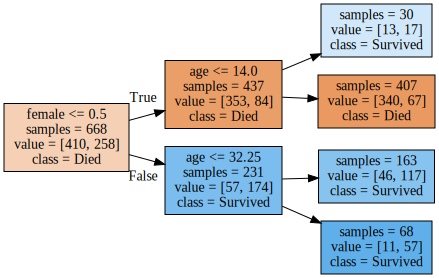

In [0]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model, out_file=None, feature_names=features, 
                           class_names=['Died', 'Survived'], 
                           filled=True, impurity=False, rotate=True)
graphviz.Source(dot_data)

### Another visualization

#### Install `dtreeviz` and dependencies

In [0]:
!pip install dtreeviz
!apt install graphviz
!apt install xdg-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xdg-utils is already the newest version (1.1.2-1ubuntu2.2).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


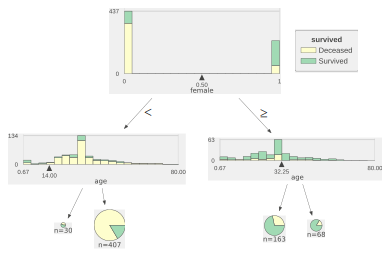

In [0]:
from dtreeviz.trees import *

dtreeviz(model,
         train[features],
         train[target],
         target_name=target,
         feature_names=features, 
         class_names=['Deceased', 'Survived']) 

# Begin with baseline models

[My data science career](https://www.linkedin.com/in/ryan-herr-b5a8a77/) began at State Farm, a Fortune 50 insurance company. I started learning in 2012 and officially earned the title in 2015.

Out of 20 data scientists on their inaugural team, I was one of only two with just a Bachelor’s degree. I didn’t have the time, money, or geographic mobility for a “traditional” Master’s, but didn’t let that stop me from changing careers...

It's amazing how much information is online, but it can be overwhelming to sift through. So I was fortunate to find a [mentor](https://www.linkedin.com/in/jason-sanchez-62093847/) to help point me in the right direction.

[My mentor taught me](https://youtu.be/0GrciaGYzV0?t=40s):

> ***Your first goal should always, always, always be getting a generalized prediction as fast as possible.*** You shouldn't spend a lot of time trying to tune your model, trying to add features, trying to engineer features, until you've actually gotten one prediction, at least. 

> The reason why that's a really good thing is because then ***you'll set a benchmark*** for yourself, and you'll be able to directly see how much effort you put in translates to a better prediction. 

> What you'll find by working on many models: some effort you put in, actually has very little effect on how well your final model does at predicting new observations. Whereas some very easy changes actually have a lot of effect. And so you get better at allocating your time more effectively.

This advice is echoed and elaborated in several sources:

#### [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)

> Why start with a baseline? A baseline will take you less than 1/10th of the time, and could provide up to 90% of the results. A baseline puts a more complex model into context. Baselines are easy to deploy.

#### [Measure Once, Cut Twice: Moving Towards Iteration in Data Science](https://blog.datarobot.com/measure-once-cut-twice-moving-towards-iteration-in-data-science)

> The iterative approach in data science starts with emphasizing the importance of getting to a first model quickly, rather than starting with the variables and features. Once the first model is built, the work then steadily focuses on continual improvement.

#### [*Data Science for Business*](https://www.safaribooksonline.com/library/view/data-science-for/9781449374273/), Chapter 7.3: Evaluation, Baseline Performance, and Implications for Investments in Data

> *Consider carefully what would be a reasonable baseline against which to compare model performance.* This is important for the data science team in order to understand whether they indeed are improving performance, and is equally important for demonstrating to stakeholders that mining the data has added value.
